In [ ]:
from google.colab import drive
drive.mount('/content/drive')


**CNN**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define constants
IMG_WIDTH, IMG_HEIGHT = 256, 256
BATCH_SIZE = 32
EPOCHS = 10

# Define data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Eugenia & Thasniya - Term paper/New Plant Diseases Dataset(Augmented)/train',
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/Eugenia & Thasniya - Term paper/New Plant Diseases Dataset(Augmented)/valid',
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 300 images belonging to 6 classes.
Found 2529 images belonging to 6 classes.


In [ ]:
# Define CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

# Evaluate model
loss, accuracy = model.evaluate(validation_generator)
print(f'Test Loss: {loss:.3f}')
print(f'Test Accuracy: {accuracy:.3f}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 167s 17s/step - accuracy: 0.1401 - loss: 3.7696 - val_accuracy: 0.2171 - val_loss: 1.8000
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 209s 18s/step - accuracy: 0.1804 - loss: 1.7628 - val_accuracy: 0.1823 - val_loss: 1.7045
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 160s 17s/step - accuracy: 0.2680 - loss: 1.6848 - val_accuracy: 0.3555 - val_loss: 1.5702
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 191s 20s/step - accuracy: 0.2896 - loss: 1.7075 - val_accuracy: 0.3618 - val_loss: 1.4257
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 173s 17s/step - accuracy: 0.4445 - loss: 1.3334 - val_accuracy: 0.5180 - val_loss: 1.3622
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 160s 17s/step - accuracy: 0.6438 - loss: 1.0200 - val_accuracy: 0.5809 - val_loss: 1.3339
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 160s 17s/step - accuracy: 0.6929 - loss: 0.8519 - val_accuracy: 0.5698 - val_loss: 1.4004
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 202s 17s/step - accuracy: 0.6539 - loss: 0.8736 - val_accuracy: 0.6453 - val_

80/80 ━━━━━━━━━━━━━━━━━━━━ 651s 8s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       218
           1       0.00      0.00      0.00       435
           2       0.18      0.48      0.26       457
           3       0.00      0.00      0.00       490
           4       0.00      0.00      0.00       448
           5       0.17      0.47      0.25       481

    accuracy                           0.18      2529
   macro avg       0.06      0.16      0.09      2529
weighted avg       0.07      0.18      0.10      2529

Confusion Matrix:
[[  0   0 105   0   0 113]
 [  0   0 190   0   0 245]
 [  0   0 220   0   0 237]
 [  0   0 242   0   0 248]
 [  0   0 198   0   0 250]
 [  0   0 253   0   0 228]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


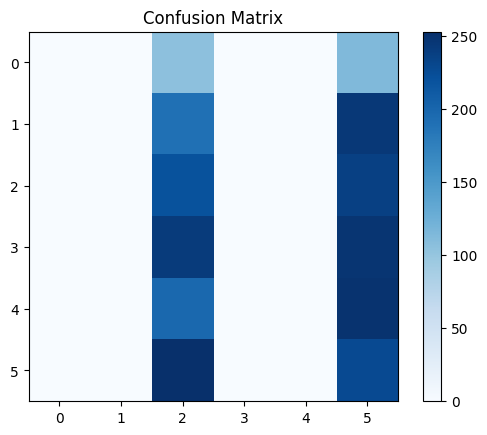

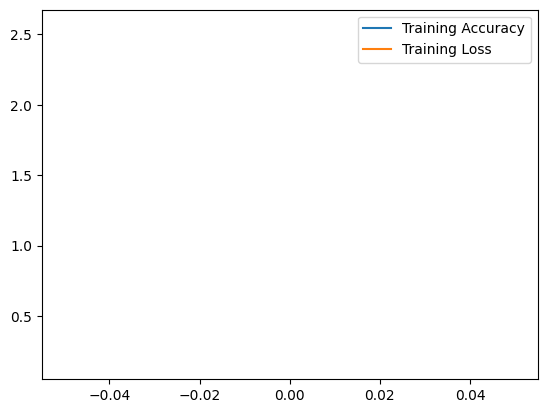

In [ ]:
# Get predictions
predictions = model.predict(validation_generator)

# Get predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes
true_classes = validation_generator.classes

# Print classification report
print('Classification Report:')
print(classification_report(true_classes, predicted_classes))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(true_classes, predicted_classes))

# Plot confusion matrix
plt.imshow(confusion_matrix(true_classes, predicted_classes), interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()

# Plot accuracy and loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['loss'], label='Training Loss')

plt.legend()
plt.show()


In [ ]:
# Function to predict the class of a single image
def predict_image(image_path):
    # Load the image
    img = load_img(image_path, target_size=(256, 256))

    # Convert the image to an array
    img_array = img_to_array(img)

    # Rescale the image
    img_array = img_array / 255.0

    # Expand the dimensions of the array
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class of the image
    predictions = model.predict(img_array)

    # Get the class label with the highest probability
    class_label = np.argmax(predictions[0])

    # Get the class labels
    class_labels = ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot']

    # Print the predicted class label
    print("Predicted class: ", class_labels[class_label])

# Test the function
image_path = '/content/drive/MyDrive/Eugenia & Thasniya - Term paper/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus/Copy of e8900c28-b9e9-41d4-b8f6-5c4be8db1296___PSU_CG 2352_90deg.JPG'
predict_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
Predicted class:  Tomato___Septoria_leaf_spot
